<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Naive prediction



# Imports
<hr style = "border:2px solid black" ></hr>

In [25]:
import matplotlib.pyplot as plt
import keras

# Helper functions
<hr style = "border:2px solid black" ></hr>

In [1]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [2]:
def trend(time, slope=0):
    return slope * time

In [3]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

In [4]:
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

In [5]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

# Shifting by one time step
<hr style = "border:2px solid black" ></hr>


- The most basic method to predict a time series is to say that the predicted value at time t + 1 is the same as the value from time t, effectively shifting the time series by a single period.
- When seasonality is present, it’s a good idea to split the series to ensure that there are whole seasons in each split.
- There is no need to do the split here because you’re just doing a naive forecast where each value t is simply the value at step t – 1, but for the purposes of illustration in the next few figures we’ll zoom in on the data from time step 1,000 onwards
    


In [6]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, .05)
baseline = 10
amplitude = 15
slope = 0.09
noise_level = 6

In [7]:
# Create the series
series = baseline + trend(time, slope)
+ seasonality(time, period=365, amplitude=amplitude)

array([15.       , 14.997777 , 14.991111 , ...,  0.7591838,  0.7529695,
       15.       ], dtype=float32)

In [8]:
# Update with noise
series += noise(time, noise_level, seed=42)

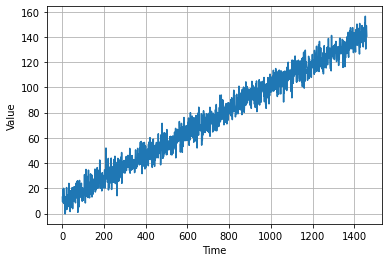

In [15]:
plot_series(time, series, format="-", start=0, end=None)

In [58]:
split_time = 1000
time_shift = 1
naive_forecast = series[split_time - time_shift:-1]
print(len(naive_forecast))

461


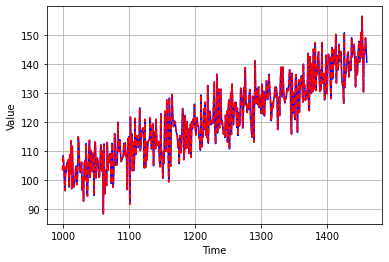

In [59]:
plot_series(time[split_time:], series[split_time:],
            format="b-", start=0, end=None)
plot_series(time[split_time - time_shift:-1],
            naive_forecast, format="r--", start=0, end=None)

In [61]:
print(keras.metrics.mean_squared_error(series[split_time:], naive_forecast).numpy()) 
print(keras.metrics.mean_absolute_error(series[split_time:], naive_forecast).numpy())

75.51126
6.8415365


# Moving Average for Prediction
<hr style = "border:2px solid black" ></hr>


- The previous naive prediction took the value at time t – 1 to be the forecasted value at time t. 
- Using a moving average is similar, but instead of just taking the value from t – 1, it takes a group of values (say, 30), averages them out, and sets that to be the predicted value at time t. 



In [64]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
    If window_size=1, then this is equivalent to naive forecast
    """
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

In [70]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]
print(len(moving_avg))
moving_avg

461


array([ 97.248116,  97.59238 ,  98.00351 ,  97.93731 ,  98.02846 ,
        98.347336,  98.89394 ,  99.25345 ,  99.95525 , 100.57193 ,
       100.40281 , 100.59914 , 100.64356 , 101.34201 , 101.30372 ,
       101.74162 , 102.10288 , 101.76191 , 101.579666, 101.649796,
       101.81925 , 101.97214 , 102.35574 , 102.49032 , 103.14517 ,
       103.78099 , 104.01448 , 103.75254 , 103.73839 , 104.06532 ,
       103.83625 , 103.594894, 103.16626 , 103.32418 , 103.673004,
       103.526726, 103.85283 , 103.51865 , 103.18873 , 103.11369 ,
       103.520164, 103.68347 , 103.64217 , 103.53285 , 103.753   ,
       103.46129 , 103.68844 , 104.03919 , 103.91068 , 104.36006 ,
       104.64124 , 104.501564, 104.785446, 104.97914 , 104.69282 ,
       104.32724 , 104.195656, 104.272934, 104.57349 , 104.64949 ,
       104.86993 , 105.165764, 105.01976 , 105.25968 , 104.87229 ,
       104.98644 , 104.537704, 104.61392 , 105.228966, 105.180534,
       105.13041 , 104.874245, 105.15142 , 105.04105 , 104.882

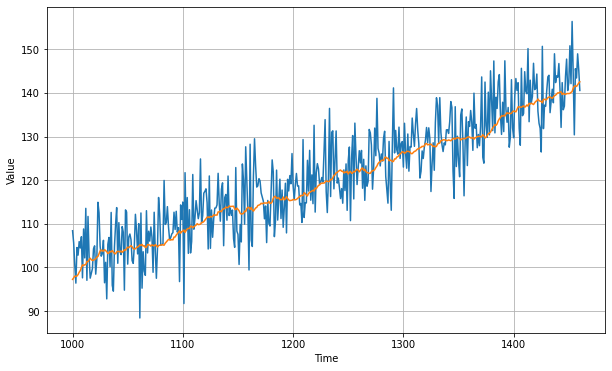

In [74]:

plt.figure(figsize=(10, 6))

time_valid = time[split_time:]
x_valid = series[split_time:]

plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [76]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy()) 
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

39.92454
5.040303



- As you can see we get an improvement in the predictions' error
- However, this approach doesn’t take into account the trend or the seasonality.




# References
<hr style = "border:2px solid black" ></hr>


- Moroney, Laurence. AI and Machine Learning for coders. O'Reilly Media, 202

